<a href="https://colab.research.google.com/github/TyamanovaMargo/DI-Bootcamp/blob/main/Mini_project_Marketing_Strategy_week3_day5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data cleaning

In [ ]:
import pandas as pd

df = pd.read_excel("US Superstore data.xls")
print(df.head())

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [18]:
print(df.shape)
print(df.isnull().sum())


(9994, 21)
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [19]:
print(df["Customer Name"].nunique())
print(df["Customer Name"].value_counts())


793
Customer Name
William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Chloris Kastensmidt    32
                       ..
Lela Donovan            1
Anthony O'Donnell       1
Carl Jackson            1
Ricardo Emerson         1
Jocasta Rupert          1
Name: count, Length: 793, dtype: int64


In [17]:
print(f"Duplicate rows: {df.duplicated().sum()}")


Duplicate rows: 0


#Which states have the most sales?

In [5]:
import pandas as pd


# Load the XLSX file into a DataFrame

df = pd.read_excel('/content/US Superstore data.xls')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [13]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [12]:
top_states = df.groupby('State')['Sales'].sum()
sorted_top_states = top_states.sort_values(ascending= False) # if True from smallest to bigger
print(sorted_top_states)

State
California              457687.6315
New York                310876.2710
Texas                   170188.0458
Washington              138641.2700
Pennsylvania            116511.9140
Florida                  89473.7080
Illinois                 80166.1010
Ohio                     78258.1360
Michigan                 76269.6140
Virginia                 70636.7200
North Carolina           55603.1640
Indiana                  53555.3600
Georgia                  49095.8400
Kentucky                 36591.7500
New Jersey               35764.3120
Arizona                  35282.0010
Wisconsin                32114.6100
Colorado                 32108.1180
Tennessee                30661.8730
Minnesota                29863.1500
Massachusetts            28634.4340
Delaware                 27451.0690
Maryland                 23705.5230
Rhode Island             22627.9560
Missouri                 22205.1500
Oklahoma                 19683.3900
Alabama                  19510.6400
Oregon                

#What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)

In [23]:
two_states_sales = df.groupby('State')['Sales'].sum().loc[['New York','California']]
two_states_prof = df.groupby('State')['Profit'].sum().loc[['New York','California']]

In [24]:
print(two_states_sales)
print(two_states_prof)

State
New York      310876.2710
California    457687.6315
Name: Sales, dtype: float64
State
New York      74038.5486
California    76381.3871
Name: Profit, dtype: float64


In [25]:
# sales_diff = two_states_sales['California'] - two_states_sales['New York']
# profit_diff = two_states_prof['California'] - two_states_prof['New York']

# print(f"Sales Difference: {sales_diff}")
# print(f"Profit Difference: {profit_diff}")


sales_diff = two_states_sales.diff().iloc[-1]  #diff() add Nun we start from second
profit_diff = two_states_prof.diff().iloc[-1]

print(f"Sales Difference: {sales_diff}")
print(f"Profit Difference: {profit_diff}")



Sales Difference: 146811.3605
Profit Difference: 2342.838499999998


#Who is an outstanding customer in New York?

In [38]:
our_state = df[df['State'] == 'New York']  #only New York
outstanding_customer = our_state.groupby('Customer Name')['Sales'].sum()

name_customer = outstanding_customer.idxmax()  # name of client
max_sales = outstanding_customer.max() # amount of sales



print(f"Outstanding customer is {name_customer} his sales is {max_sales}")

Outstanding customer is Tom Ashbrook his sales is 13723.498000000001


#Are there any differences among states in profitability?

In [48]:
prof_diff = df.groupby(['State','Region'])['Profit'].sum()
sorted_prof_dif = prof_diff.sort_values(ascending= True) # if True from smallest to bigger

print(sorted_prof_dif)

State                 Region 
Texas                 Central   -25729.3563
Ohio                  East      -16971.3766
Pennsylvania          East      -15559.9603
Illinois              Central   -12607.8870
North Carolina        South      -7490.9122
Colorado              West       -6527.8579
Tennessee             South      -5341.6936
Arizona               West       -3427.9246
Florida               South      -3399.3017
Oregon                West       -1190.4705
Wyoming               West         100.1960
West Virginia         East         185.9216
North Dakota          Central      230.1497
South Dakota          Central      394.8283
Maine                 East         454.4862
Idaho                 West         826.7231
Kansas                Central      836.4435
District of Columbia  East        1059.5893
New Mexico            West        1157.1161
Iowa                  Central     1183.8119
New Hampshire         East        1706.5028
South Carolina        South       1769.0566
Mo

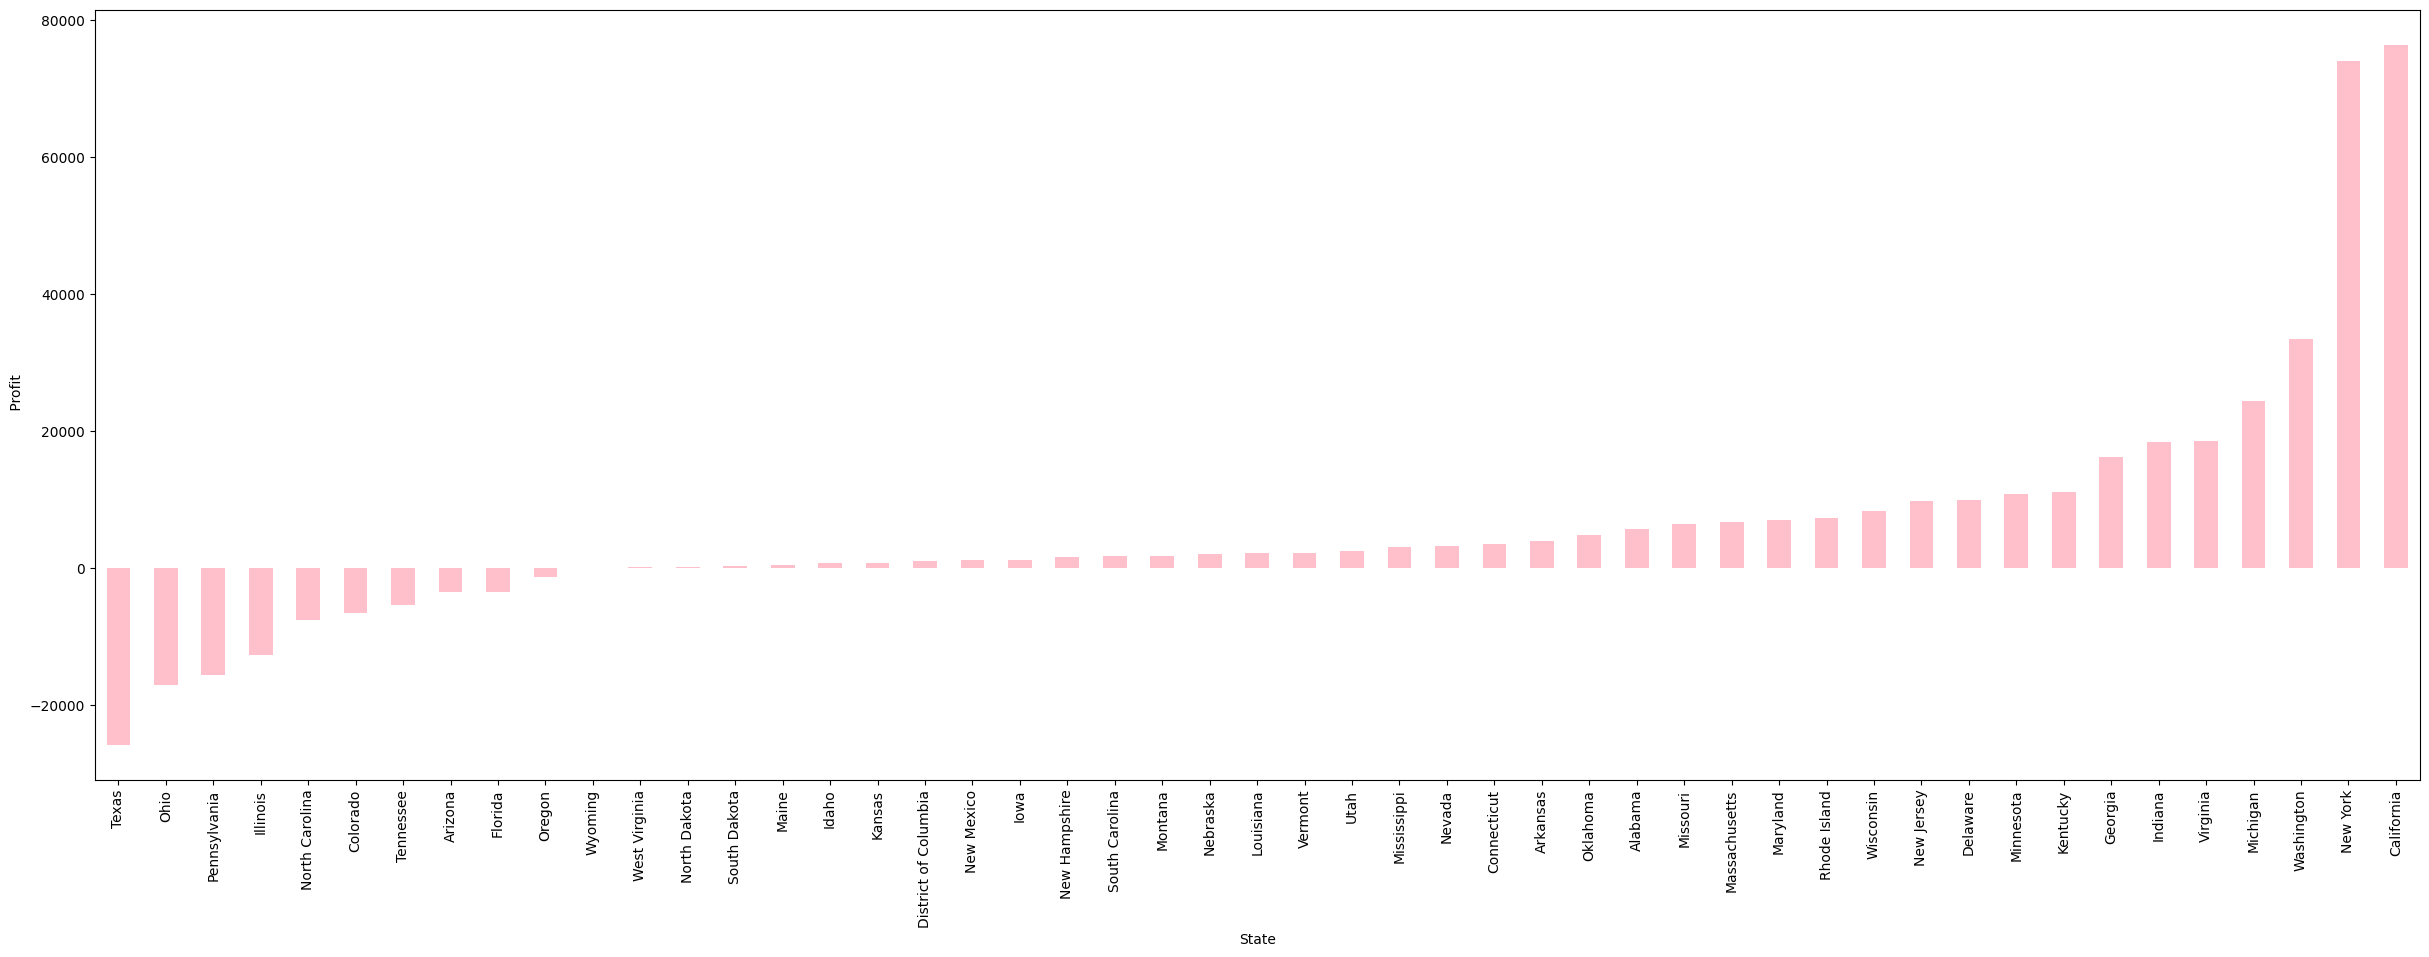

In [47]:
import matplotlib.pyplot as plt

sorted_prof_dif.plot(kind='bar', figsize=(30, 10), color='pink')
plt.xlabel("State")
plt.ylabel(" Profit")

plt.show()


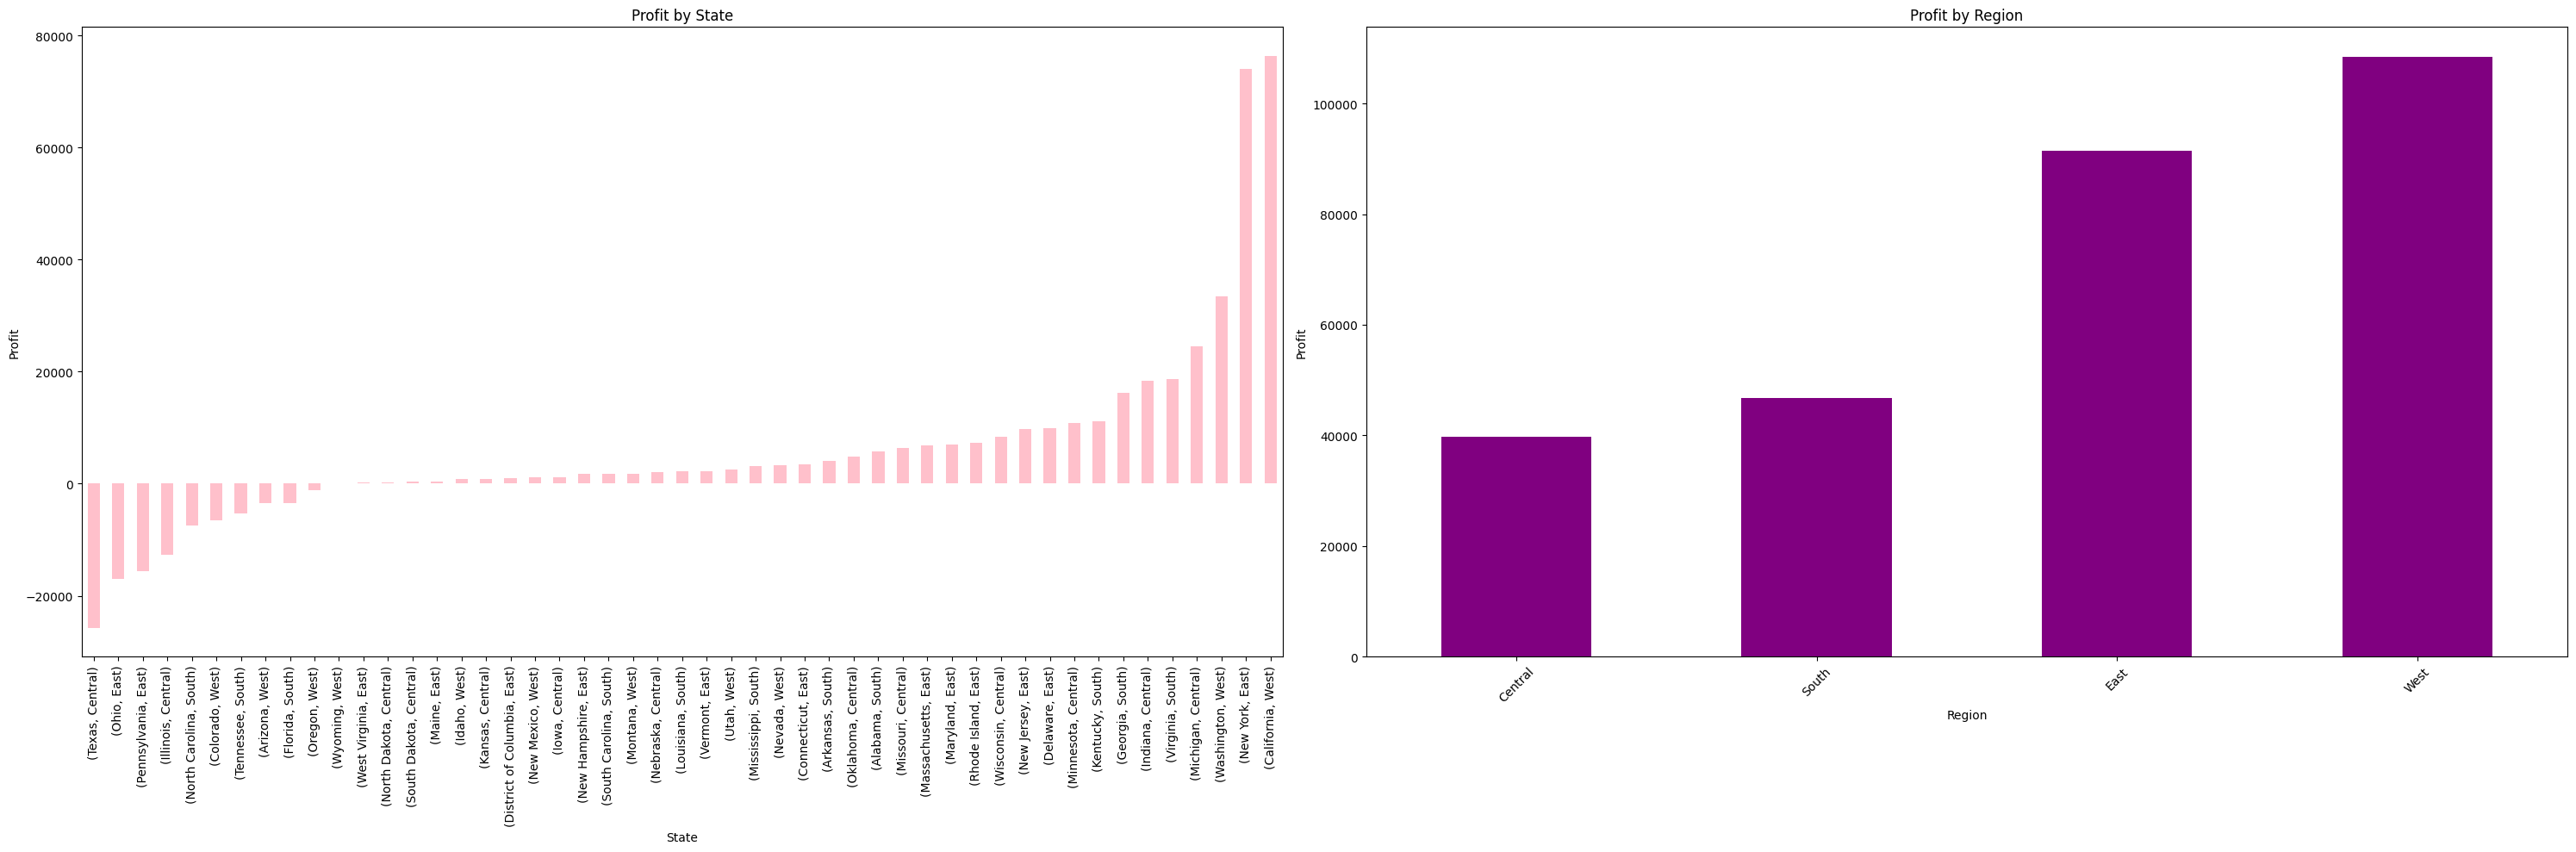

In [50]:

region_total_profit = df.groupby('Region')['Profit'].sum().sort_values()

#create fig
fig, axes = plt.subplots(1, 2, figsize=(30, 10))

#  1 subplot
sorted_prof_dif.plot(kind='bar', color='pink', ax=axes[0])
axes[0].set_xlabel("State")
axes[0].set_ylabel("Profit")
axes[0].set_title("Profit by State")
axes[0].tick_params(axis='x', rotation=90)

# 2 subplot
region_total_profit.plot(kind='bar', color='purple', ax=axes[1])
axes[1].set_xlabel("Region")
axes[1].set_ylabel("Profit")
axes[1].set_title("Profit by Region")
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


#The Pareto Principle



1.   Group by Customer and sum their profit
2.   Sort Customers by profit in descending order
1.   Calculate cumulative profit  and check how many  customers contribute  to 80% of total prof
2.   Plot












In [51]:
import pandas as pd


# Load the XLSX file into a DataFrame

df = pd.read_excel('/content/US Superstore data.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
prof_cust = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False)
print(prof_cust)

Customer Name
Tamara Chand      8981.3239
Raymond Buch      6976.0959
Sanjit Chand      5757.4119
Hunter Lopez      5622.4292
Adrian Barton     5444.8055
                    ...    
Henry Goldwyn    -2797.9635
Sharelle Roach   -3333.9144
Luke Foster      -3583.9770
Grant Thornton   -4108.6589
Cindy Stewart    -6626.3895
Name: Profit, Length: 793, dtype: float64


In [5]:
print(df['Customer ID'].count())

9994


In [6]:
common_profit = prof_cust.cumsum() / prof_cust.sum() # recalculates the accumulated amount as a percentage of the total profit.
print(prof_cust.sum())


# print(common_profit.sort_values(ascending=False))

# 0.11 -> 11 % from common profit
#1.24 -> 124 % from common profit???

print(prof_cust[prof_cust < 0])# their profit minus

prof_cust_positive = prof_cust[prof_cust > 0].sort_values(ascending=False)
common_profit_positive = prof_cust_positive.cumsum() / prof_cust_positive.sum()
print(common_profit_positive)

286397.0216999999
Customer Name
Jasper Cacioppo      -0.3556
Paul Lucas           -0.7527
Mitch Gastineau      -1.2453
Adrian Hane          -2.3146
Thais Sissman        -3.3156
                     ...    
Henry Goldwyn     -2797.9635
Sharelle Roach    -3333.9144
Luke Foster       -3583.9770
Grant Thornton    -4108.6589
Cindy Stewart     -6626.3895
Name: Profit, Length: 155, dtype: float64
Customer Name
Tamara Chand       0.025114
Raymond Buch       0.044621
Sanjit Chand       0.060720
Hunter Lopez       0.076442
Adrian Barton      0.091667
                     ...   
Carl Jackson       0.999996
Eric Barreto       0.999998
Lela Donovan       0.999999
Ritsa Hightower    1.000000
Karen Seio         1.000000
Name: Profit, Length: 638, dtype: float64


In [7]:
top_customers = common_profit_positive[common_profit_positive <= 0.80].index.tolist()
print(top_customers)


percent_customers = len(top_customers) / len(common_profit_positive) * 100
print(f"{percent_customers:.2f}% of customers contribute to 80% of total profit.")


['Tamara Chand', 'Raymond Buch', 'Sanjit Chand', 'Hunter Lopez', 'Adrian Barton', 'Tom Ashbrook', 'Christopher Martinez', 'Keith Dawkins', 'Andy Reiter', 'Daniel Raglin', 'Tom Boeckenhauer', 'Nathan Mautz', 'Sanjit Engle', 'Bill Shonely', 'Harry Marie', 'Todd Sumrall', 'Brian Moss', 'Christopher Conant', 'Jane Waco', 'Helen Wasserman', 'Greg Tran', 'Laura Armstrong', 'Adam Bellavance', 'Fred Hopkins', 'Pete Kriz', 'Steven Roelle', 'Shirley Daniels', 'Clay Ludtke', 'Robert Marley', 'Alan Dominguez', 'Maria Etezadi', 'Mark Cousins', 'Yana Sorensen', 'Katrina Willman', 'Penelope Sewall', 'Darrin Martin', 'Mitch Willingham', 'Karen Ferguson', 'Dan Reichenbach', 'Jim Epp', 'Justin Deggeller', 'Valerie Dominguez', 'Rick Wilson', 'John Murray', 'Corinna Mitchell', 'Dennis Pardue', 'Ben Ferrer', 'Paul Prost', 'Bill Eplett', 'Grace Kelly', 'James Galang', 'Edward Hooks', 'Amy Cox', 'Dianna Wilson', 'Eugene Moren', 'Denise Monton', 'Nick Crebassa', 'Alan Hwang', 'Yoseph Carroll', 'Anna Häberlin'

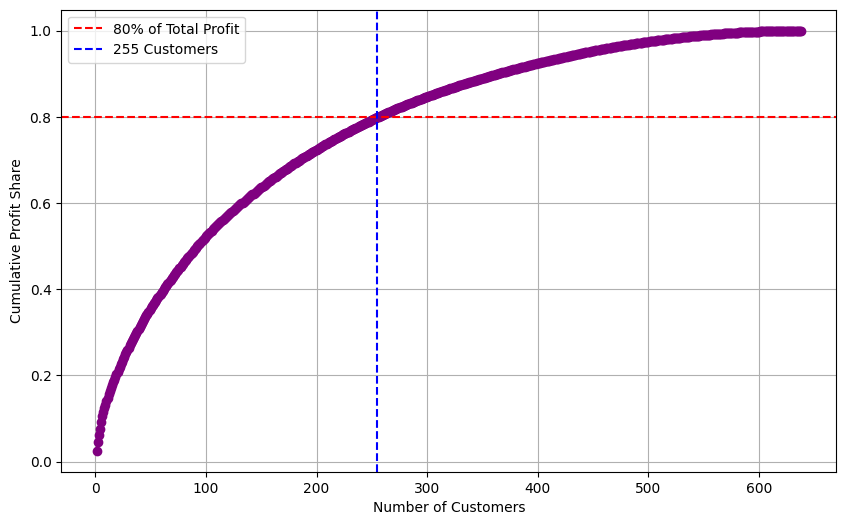

In [67]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(common_profit_positive) + 1), common_profit_positive, marker='o', linestyle='-', color='purple')


plt.axhline(y=0.80, color='red', linestyle='--', label='80% of Total Profit')


plt.axvline(x=len(top_customers), color='blue', linestyle='--', label=f'{len(top_customers)} Customers')


plt.xlabel("Number of Customers")
plt.ylabel("Cumulative Profit Share")


plt.legend()
plt.grid(True)

plt.show()


#What are the Top 20 cities by Sales ? What about the Top 20 cities by Profit ? Are there any difference among cities in profitability ? (Identify the top 20 cities based on total sales and total profit and analyze differences in profitability among these cities.)

In [68]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [80]:
top_city = df.groupby('City')[['Sales', 'Profit']].sum()
# print(top_city)


top_sales_city = top_city.sort_values(by='Sales', ascending=False).head(20)
top_profit_city = top_city.sort_values(by='Profit', ascending=False).head(20)

print("Top 20 cities sorted by sales:")
print(top_sales_city)

print("\nTop 20 cities sorted  by profit:")
print(top_profit_city)


Top 20 cities sorted by sales:
                     Sales      Profit
City                                  
New York City  256368.1610  62036.9837
Los Angeles    175851.3410  30440.7579
Seattle        119540.7420  29156.0967
San Francisco  112669.0920  17507.3854
Philadelphia   109077.0130 -13837.7674
Houston         64504.7604 -10153.5485
Chicago         48539.5410  -6654.5688
San Diego       47521.0290   6377.1960
Jacksonville    44713.1830  -2323.8350
Springfield     43054.3420   6200.6974
Detroit         42446.9440  13181.7908
Columbus        38706.2430   5897.1013
Newark          28576.1190   5793.7588
Columbia        25283.3240   5606.1167
Lafayette       25036.2000  10018.3876
Jackson         24963.8580   7581.6828
San Antonio     21843.5280  -7299.0502
Burlington      21668.0820  -3622.8772
Arlington       20214.5320   4169.6969
Dallas          20131.9322  -2846.5257

Top 20 cities sorted  by profit:
                    Sales      Profit
City                                 
N


<!-- <font size="8">Some cities have high sales but low or even negative profit and  have lower sales but high profit</font> -->
<font size="5" color="Pink">Some cities have high sales but low or even negative profit and some have lower sales but high profit</font>

<font size="5" color="white">*Philadelphia* 5th in the top of sale , but in the same time  has a loss in profit (-13,837.77).
*Houston*also has negative profit (-10,153.55) despite high sales.
*San Diego* in the both tops</font>



#What are the Top 20 customers by Sales?

In [85]:
top_customer = df.groupby('Customer Name')[['Sales']].sum()
# print(top_city)


top_sales_of_cust = top_customer.sort_values(by='Sales', ascending=False).head(20)




print("Top 20 customers by Sales:")
print(top_sales_of_cust)

Top 20 customers by Sales:
                        Sales
Customer Name                
Sean Miller         25043.050
Tamara Chand        19052.218
Raymond Buch        15117.339
Tom Ashbrook        14595.620
Adrian Barton       14473.571
Ken Lonsdale        14175.229
Sanjit Chand        14142.334
Hunter Lopez        12873.298
Sanjit Engle        12209.438
Christopher Conant  12129.072
Todd Sumrall        11891.751
Greg Tran           11820.120
Becky Martin        11789.630
Seth Vernon         11470.950
Caroline Jumper     11164.974
Clay Ludtke         10880.546
Maria Etezadi       10663.728
Karen Ferguson      10604.266
Bill Shonely        10501.653
Edward Hooks        10310.880


#Plot the Cumulative curve in Sales by Customers. Can we apply Pareto principle to customers and Sales ?

In [1]:
import pandas as pd


# Load the XLSX file into a DataFrame

df = pd.read_excel('/content/US Superstore data.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


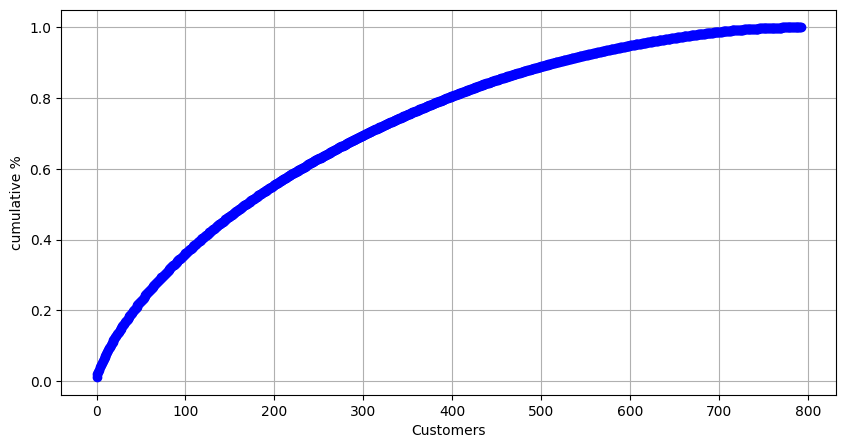

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


sales_by_customer = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False)

cumulative_sales = sales_by_customer.cumsum() / sales_by_customer.sum()


plt.figure(figsize=(10, 5))
plt.plot(cumulative_sales.values, marker="o", linestyle="-", color="b")


plt.xlabel("Customers")
plt.ylabel("cumulative %")
plt.grid()

plt.show()


Can we apply Pareto principle to customers and Sales ?



> According result almost 50% makes 80 % profit

